In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
# collect data from website
df = pd.DataFrame()
url = 'http://www.stat-nba.com/query.php?page=0&crtcol=formular&order=1&QueryType=ss&SsType=season&AT=avg&Formular=ptsaddastaddtrbaddstladdblksubstracttov&PageNum=160&Season0=2019&Mp0=25&G0=25&Season1=2020#label_show_result'
df = df.append(pd.read_html(url), ignore_index=True)

In [3]:
df.head()

,Unnamed: 0,球员,赛季,球队,出场,首发,时间,投篮,命中,出手,...,后场,助攻,抢断,盖帽,失误,犯规,得分,胜,负,公式
0,1,扬尼斯-阿德托昆博,19-20,雄鹿,57,57,30.9,54.7%,10.9,20.0,...,11.5,5.8,1.1,1.0,3.7,3.0,29.7,48,9,47.6
1,2,詹姆斯-哈登,19-20,火箭,61,61,36.7,43.5%,9.9,22.7,...,5.3,7.4,1.7,0.9,4.4,3.4,34.4,39,22,46.3
2,3,卢卡-东契奇,19-20,独行侠,54,54,33.3,46.1%,9.5,20.6,...,8.0,8.7,1.1,0.2,4.2,2.5,28.7,34,20,43.7
3,4,勒布朗-詹姆斯,19-20,湖人,60,60,34.9,49.8%,9.8,19.6,...,6.9,10.6,1.2,0.5,4.0,1.8,25.7,47,13,42.0
4,5,安东尼-戴维斯,19-20,湖人,55,55,34.4,51.1%,9.2,18.1,...,7.1,3.1,1.5,2.4,2.4,2.5,26.7,43,12,40.7


In [4]:
# delete extra lines
df = df.drop(['Unnamed: 0','赛季','球队','出场','首发','时间','投篮','命中','出手','三分','命中','出手','罚球','命中','出手','命中.1','出手.1','命中.2','出手.2','前场','负'],axis=1)

# rename the colunms in English
df = df.rename(columns={'球员':'player','篮板':'rebound','后场':'D_rebound','助攻':'assist','抢断':'steal','盖帽':'block','失误':'turnover','犯规':'foul','得分':'point','胜':'win','公式':'MVP'})

In [5]:
df.head()

,player,rebound,D_rebound,assist,steal,block,turnover,foul,point,win,MVP
0,扬尼斯-阿德托昆博,13.7,11.5,5.8,1.1,1.0,3.7,3.0,29.7,48,47.6
1,詹姆斯-哈登,6.3,5.3,7.4,1.7,0.9,4.4,3.4,34.4,39,46.3
2,卢卡-东契奇,9.3,8.0,8.7,1.1,0.2,4.2,2.5,28.7,34,43.7
3,勒布朗-詹姆斯,7.9,6.9,10.6,1.2,0.5,4.0,1.8,25.7,47,42.0
4,安东尼-戴维斯,9.4,7.1,3.1,1.5,2.4,2.4,2.5,26.7,43,40.7


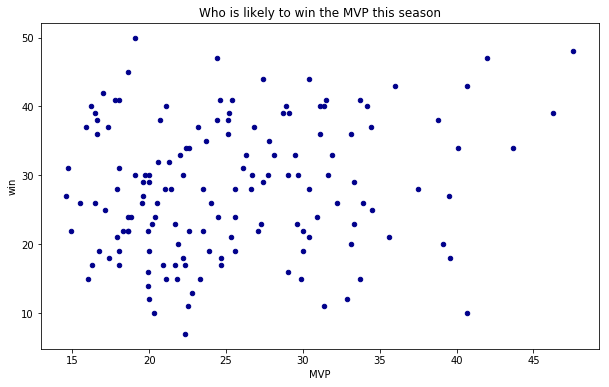

In [6]:
# draw the scatter plot of MVP
df.plot(kind='scatter', x='MVP', y='win', figsize=(10, 6), color='darkblue')
plt.title('Who is likely to win the MVP this season')
plt.xlabel('MVP')
plt.ylabel('win')
plt.show()

In [7]:
# set the dateframe for MVP
df_MVP = df[['MVP','win']]

# according to the scatter plot above, set 5 clusters
clf_MVP = KMeans(n_clusters=5)

# modeling
clf_MVP = clf_MVP.fit(df_MVP)

# see the results of clusters
clf_MVP.cluster_centers_

array([[32.94230769, 21.30769231],
       [22.73030303, 38.6969697 ],
       [21.49736842, 27.89473684],
       [20.68      , 17.42857143],
       [36.55555556, 39.66666667]])

In [8]:
# add the label to the dataframe
df_MVP['label'] = clf_MVP.labels_

# check the dataframe
df_MVP.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,MVP,win,label
0,47.6,48,4
1,46.3,39,4
2,43.7,34,4
3,42.0,47,4
4,40.7,43,4


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


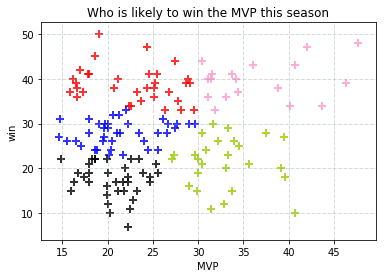

In [9]:
# extract the label of different labels
df_MVP0 = df_MVP.loc[df_MVP["label"] == 0]
df_MVP1 = df_MVP.loc[df_MVP["label"] == 1]
df_MVP2 = df_MVP.loc[df_MVP["label"] == 2]
df_MVP3 = df_MVP.loc[df_MVP["label"] == 3]
df_MVP4 = df_MVP.loc[df_MVP["label"] == 4]

# draw the scatter point of k-means clustering
plt.rc('font', family='STXihei', size=10)
plt.scatter(df_MVP0['MVP'],df_MVP0['win'],50,color='#99CC01',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_MVP1['MVP'],df_MVP1['win'],50,color='#FE0000',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_MVP2['MVP'],df_MVP2['win'],50,color='#0000FE',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_MVP3['MVP'],df_MVP3['win'],50,color='#000000',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_MVP4['MVP'],df_MVP4['win'],50,color='#FF99CC',marker='+',linewidth=2,alpha=0.8)
plt.title('Who is likely to win the MVP this season')
plt.xlabel('MVP')
plt.ylabel('win')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
plt.show()

In [10]:
# add the column of DOPY
df['DPOY'] = df.apply(lambda x: x['D_rebound'] + x['steal'] + x['block'] - x['foul'], axis=1)
df.head()

,player,rebound,D_rebound,assist,steal,block,turnover,foul,point,win,MVP,DPOY
0,扬尼斯-阿德托昆博,13.7,11.5,5.8,1.1,1.0,3.7,3.0,29.7,48,47.6,10.6
1,詹姆斯-哈登,6.3,5.3,7.4,1.7,0.9,4.4,3.4,34.4,39,46.3,4.5
2,卢卡-东契奇,9.3,8.0,8.7,1.1,0.2,4.2,2.5,28.7,34,43.7,6.8
3,勒布朗-詹姆斯,7.9,6.9,10.6,1.2,0.5,4.0,1.8,25.7,47,42.0,6.8
4,安东尼-戴维斯,9.4,7.1,3.1,1.5,2.4,2.4,2.5,26.7,43,40.7,8.5


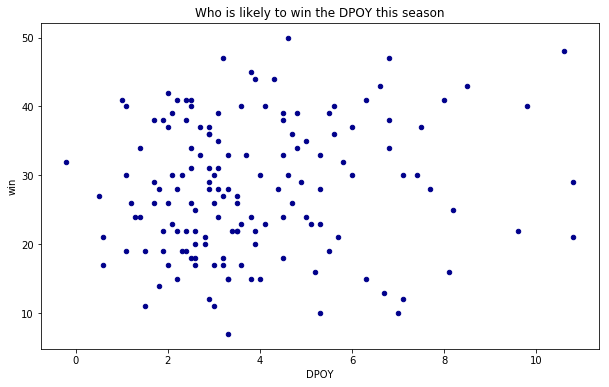

In [11]:
# draw the scatter plot of DPOY
df.plot(kind='scatter', x='DPOY', y='win', figsize=(10, 6), color='darkblue')
plt.title('Who is likely to win the DPOY this season')
plt.xlabel('DPOY')
plt.ylabel('win')
plt.show()

In [12]:
# set the dateframe for DPOY
df_DPOY = df[['DPOY','win']]

# according to the scatter plot above, set 5 clusters
clf_DPOY = KMeans(n_clusters=5)

# modeling
clf_DPOY = clf_DPOY.fit(df_DPOY)

# see the results of clusters
clf_DPOY.cluster_centers_

array([[ 3.93235294, 38.58823529],
       [ 3.63611111, 23.13888889],
       [ 3.55454545, 15.45454545],
       [ 3.81315789, 30.23684211],
       [ 5.81111111, 45.66666667]])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


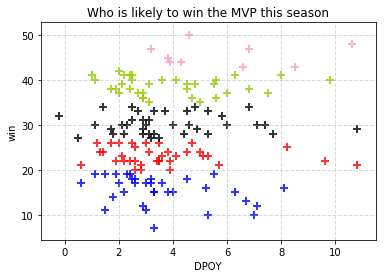

In [13]:
# add the label to the dataframe
df_DPOY['label'] = clf_DPOY.labels_

# extract the label of different labels
df_DPOY0 = df_DPOY.loc[df_DPOY["label"] == 0]
df_DPOY1 = df_DPOY.loc[df_DPOY["label"] == 1]
df_DPOY2 = df_DPOY.loc[df_DPOY["label"] == 2]
df_DPOY3 = df_DPOY.loc[df_DPOY["label"] == 3]
df_DPOY4 = df_DPOY.loc[df_DPOY["label"] == 4]

# draw the scatter point of k-means clustering
plt.rc('font', family='STXihei', size=10)
plt.scatter(df_DPOY0['DPOY'],df_DPOY0['win'],50,color='#99CC01',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_DPOY1['DPOY'],df_DPOY1['win'],50,color='#FE0000',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_DPOY2['DPOY'],df_DPOY2['win'],50,color='#0000FE',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_DPOY3['DPOY'],df_DPOY3['win'],50,color='#000000',marker='+',linewidth=2,alpha=0.8)
plt.scatter(df_DPOY4['DPOY'],df_DPOY4['win'],50,color='#FF99CC',marker='+',linewidth=2,alpha=0.8)

plt.title('Who is likely to win the MVP this season')
plt.xlabel('DPOY')
plt.ylabel('win')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
plt.show()